# Advanced Regression Assignment

## Objective : This assignment has the objective of finding significant variables and using regularization to build a spare regression model that neither underfits nor overfits the data. The dataset used here is a housing dataset that have multiple attributes of the house and the sale price. The goal is to build a model to predict the sales price

In [733]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as ss
from scipy import stats


## 1.1 Data Reading and Cleansing


In [734]:
# Reading the dataset
df = pd.read_csv('train.csv')

In [735]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [736]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [737]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [738]:
#remove these columns as they have very less values
df = df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

In [739]:
#Sales Price has outliers, so remove top 5% of data
q95 = df.SalePrice.quantile(0.95)
df = df[df['SalePrice'] < q95]

In [740]:
#Sales Price quantiles are much more in line now
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1387.000000,1387.000000,1132.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1380.000000,1387.000000,...,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,731.725306,57.480173,68.900177,10126.735400,5.964672,5.594088,1969.849315,1983.912040,88.510870,413.369863,...,88.950252,44.492430,22.454939,3.259553,14.630858,2.503965,45.777938,6.317952,2007.812545,168807.803172
std,423.151609,42.931606,23.789597,8342.357117,1.268803,1.119959,30.012714,20.684521,156.445207,426.216517,...,120.788647,65.574697,61.573581,28.684865,54.793414,38.454380,508.917656,2.704118,1.326623,57446.595410
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.500000,20.000000,58.750000,7420.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,128700.000000
50%,736.000000,50.000000,68.000000,9297.000000,6.000000,5.000000,1971.000000,1992.000000,0.000000,365.000000,...,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,159000.000000
75%,1098.500000,70.000000,80.000000,11281.000000,7.000000,6.000000,1999.000000,2003.000000,140.500000,680.000000,...,164.500000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,201000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,326000.000000


In [741]:
#checking null percentage in each column
null_percentage=df.isnull().sum()/len(df.index)*100
null_percentage.loc[null_percentage>0]

LotFrontage     18.385004
MasVnrType       0.504686
MasVnrArea       0.504686
BsmtQual         2.667628
BsmtCond         2.667628
BsmtExposure     2.739726
BsmtFinType1     2.667628
BsmtFinType2     2.739726
Electrical       0.072098
FireplaceQu     49.603461
GarageType       5.839942
GarageYrBlt      5.839942
GarageFinish     5.839942
GarageQual       5.839942
GarageCond       5.839942
dtype: float64

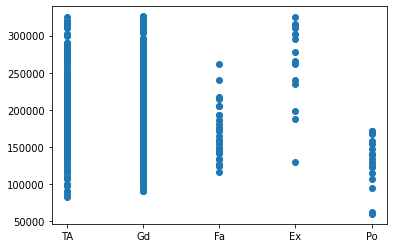

In [742]:
#Check how fireplaceQuality is related to Sale Price
df1 = df[['SalePrice', 'FireplaceQu']]
df1 = df1.dropna()
plt.scatter( df1['FireplaceQu'] , df1['SalePrice'])

### Its apparent the fireplace quality doesn't have a significant relation with Sales Price so it can be safely dropped

In [743]:
df = df.drop(columns = ['FireplaceQu'])

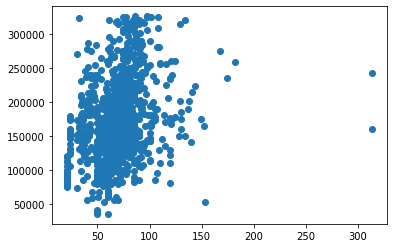

In [744]:
#Check how LotFrontage is related to Sale Price 
df1 = df[['SalePrice', 'LotFrontage']]
df1 = df1.dropna()
plt.scatter( df1['LotFrontage'] , df1['SalePrice'])


### Though there's a lot of variance, there seems to be an overall increasing trend for this variable so we'll impute the missing values with median

### Others have a very less percentage of missing values, so lets go with median to impute

In [745]:
df.fillna(df.median(), inplace=True)

In [746]:
#re-checking null percentage in each column
null_percentage=df.isnull().sum()/len(df.index)*100
null_percentage.loc[null_percentage>0]

MasVnrType      0.504686
BsmtQual        2.667628
BsmtCond        2.667628
BsmtExposure    2.739726
BsmtFinType1    2.667628
BsmtFinType2    2.739726
Electrical      0.072098
GarageType      5.839942
GarageFinish    5.839942
GarageQual      5.839942
GarageCond      5.839942
dtype: float64

### These are categorical variables so cannot be imputed by median. Impute it with 'Unknown'. We can remove this when creating dummy variables

In [747]:
idx = list(null_percentage.loc[null_percentage>0].index)
idx

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

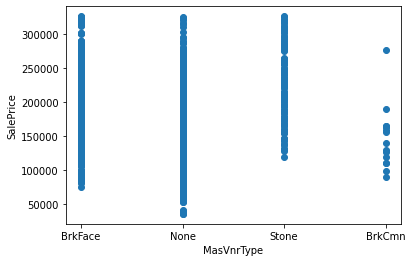

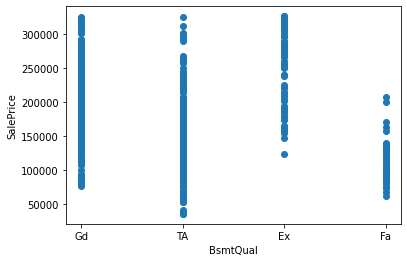

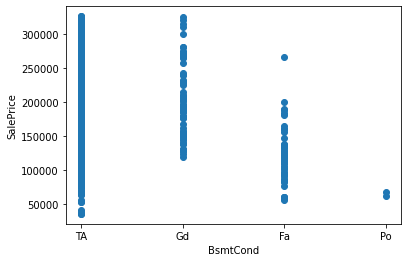

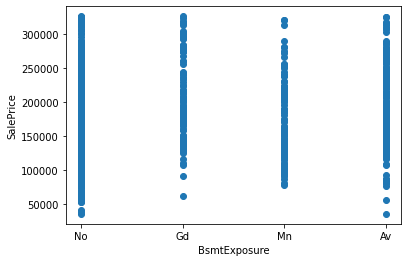

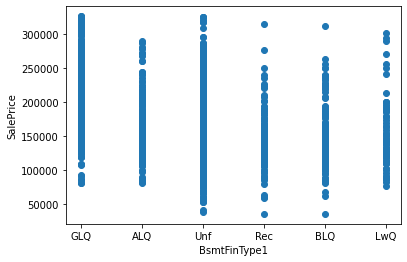

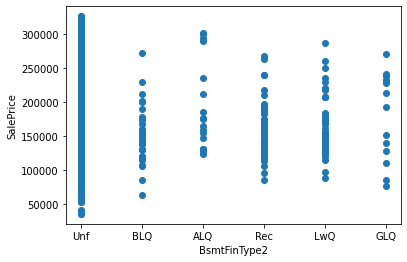

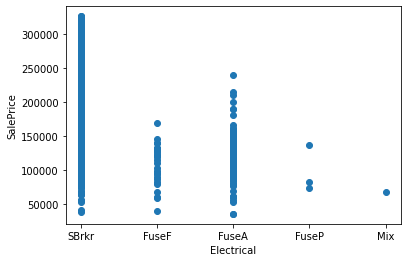

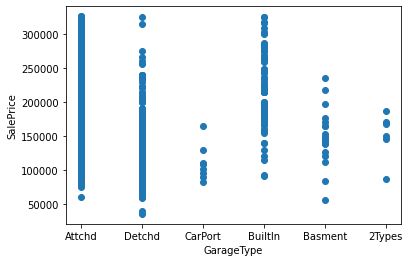

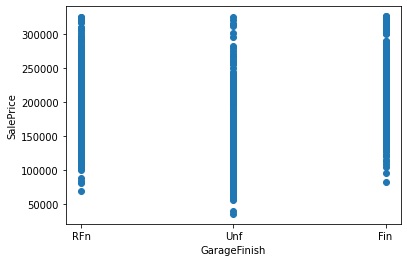

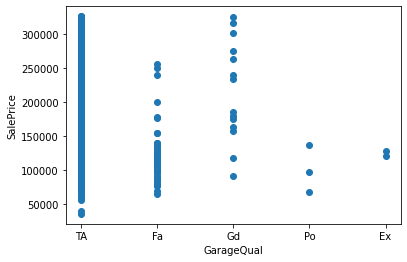

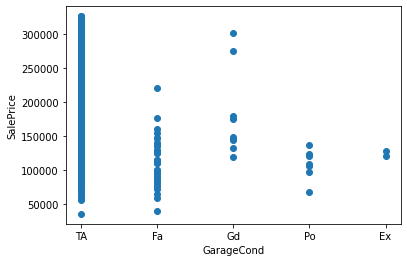

In [748]:
for col in idx:
    df1 = df[['SalePrice', col]]
    df1 = df1.dropna()
    plt.scatter( df1[col] , df1['SalePrice'])
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.show()

In [749]:
df.fillna('Unknown', inplace = True)

In [750]:
#re-checking null percentage in each column
null_percentage=df.isnull().sum()/len(df.index)*100
null_percentage.loc[null_percentage>0]

Series([], dtype: float64)

### No more nulls left

## 1.2 EDA

In [751]:
#Drop Id is its not relevant
df = df.drop(columns = ['Id'])

In [752]:
#Create a new DF for analysis
data  = df

In [753]:
#remove Sales Price as its not a predictor
data_predictors = data.iloc[:, :-1]

In [754]:
data_predictors_num = data_predictors.select_dtypes(include=['int64','float64'])
data_predictors_cat = data_predictors.select_dtypes(include=['object']) 

In [755]:
data_predictors_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [756]:
data_predictors_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


### Create boxplots for categorical variables and see if there are any variables that can be eliminated by visual inspection

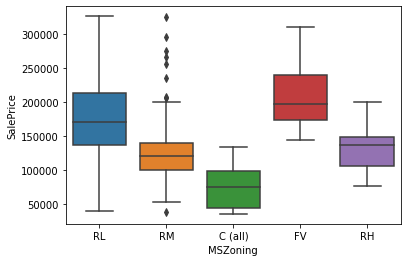

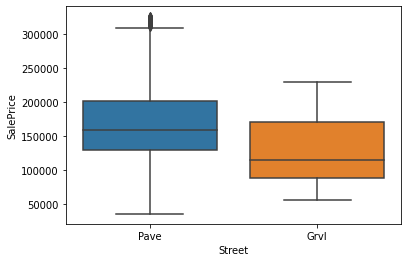

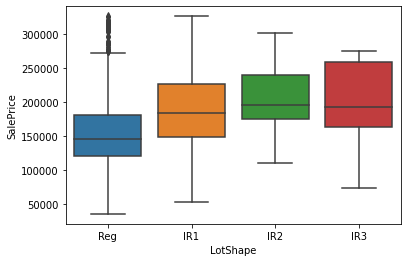

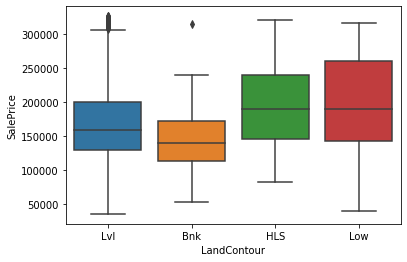

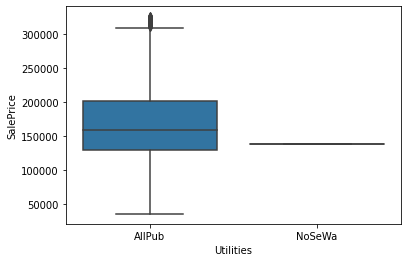

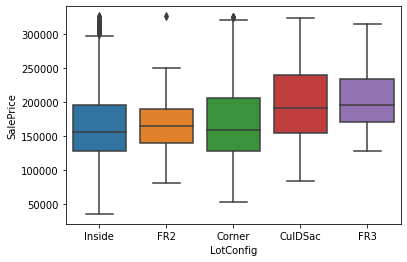

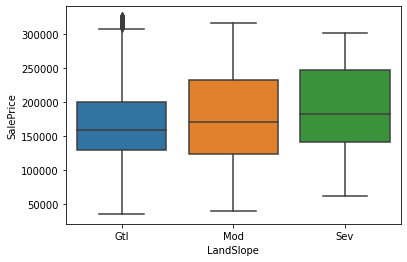

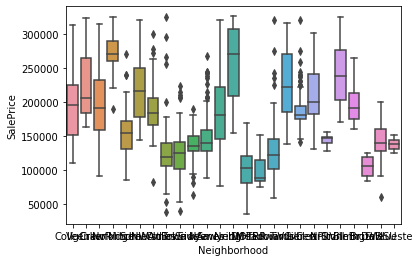

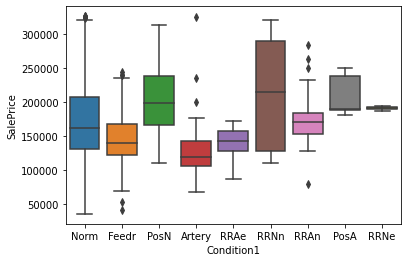

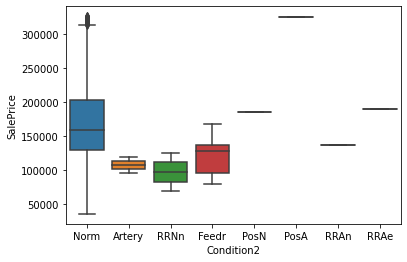

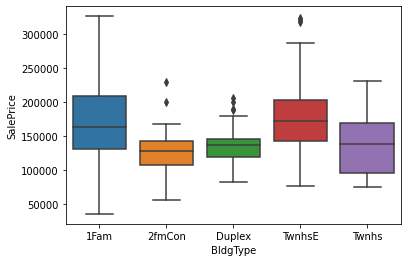

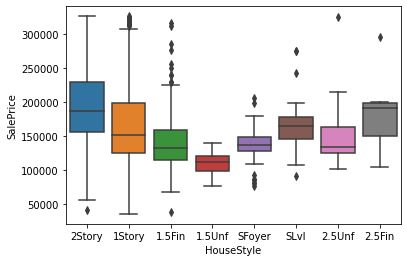

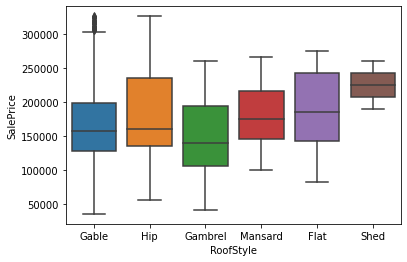

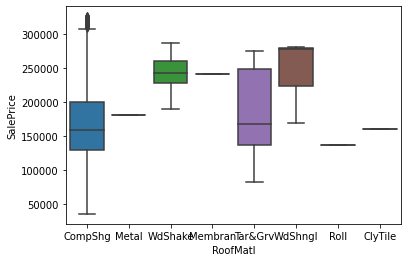

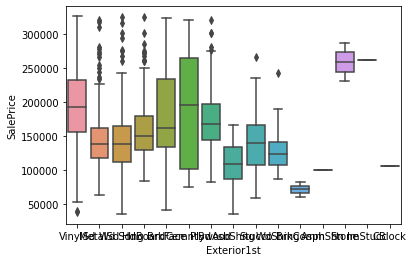

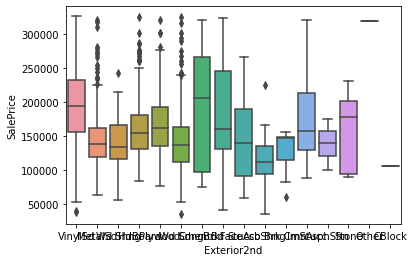

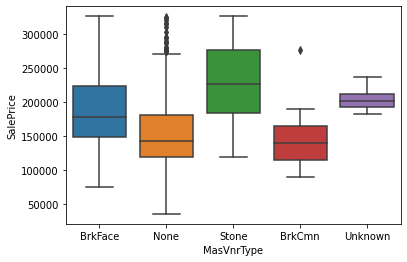

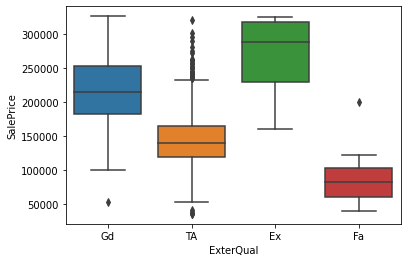

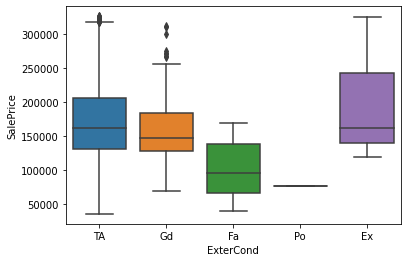

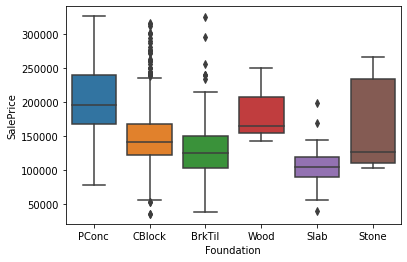

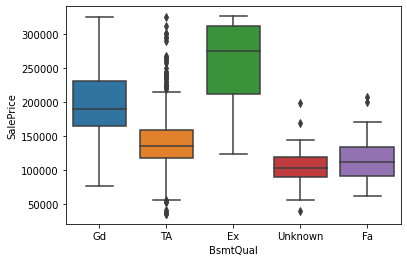

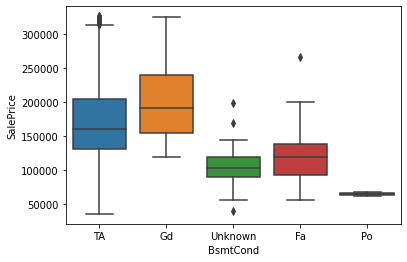

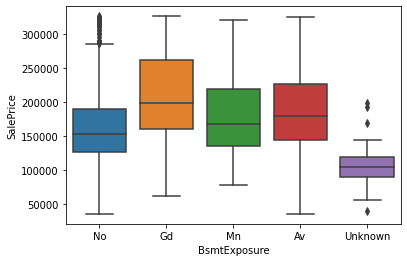

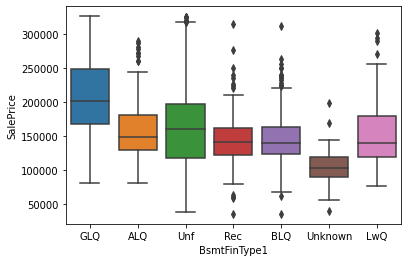

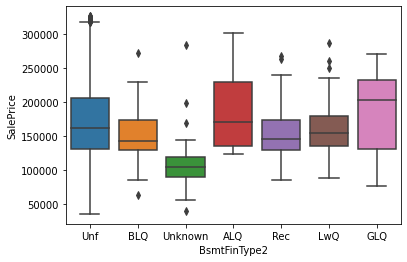

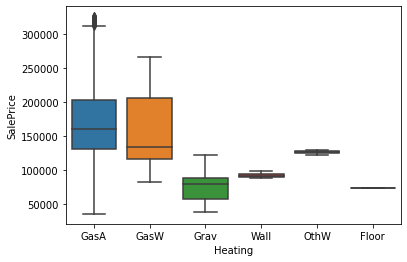

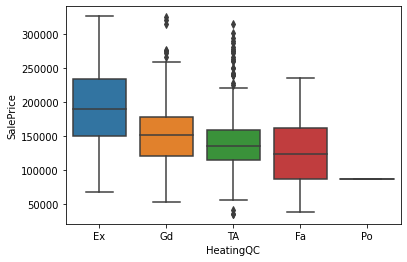

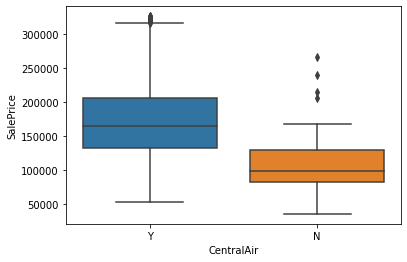

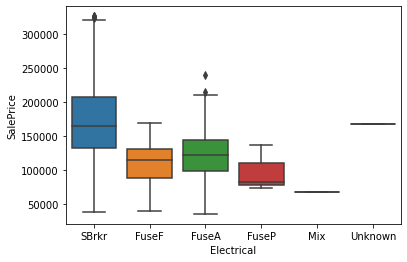

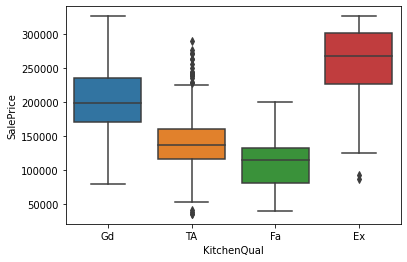

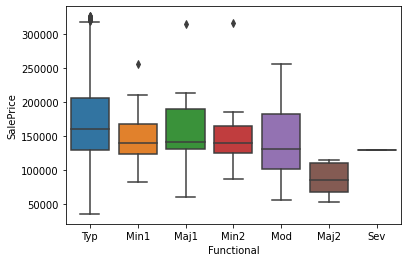

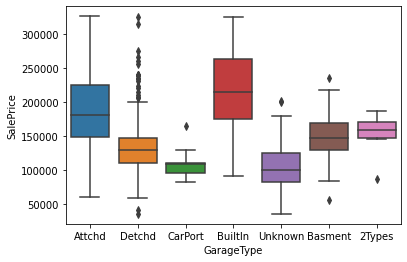

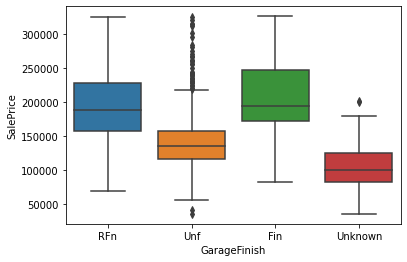

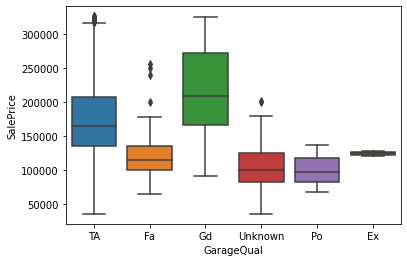

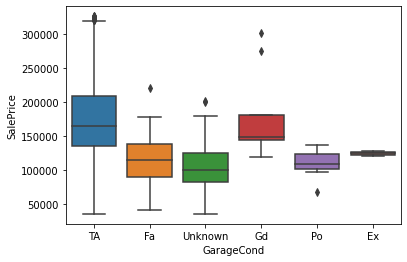

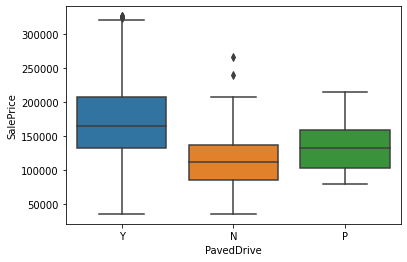

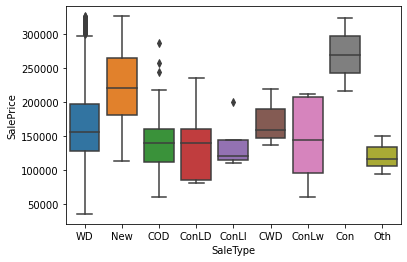

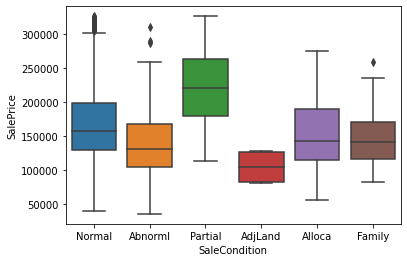

In [757]:
for col in data_predictors_cat.columns:

    sns.boxplot(x = col, y = 'SalePrice', data = data)
    plt.show()

### There are simply a hug number of variables to make any decision on elimination by visual inspection, but this can be userful later to reference. 
### Do the same thing for numerical columns. Create Scetter Plots

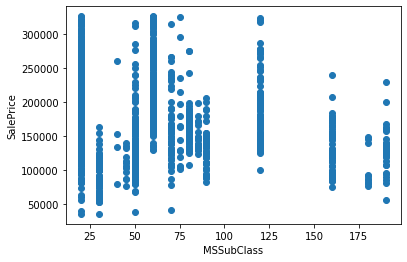

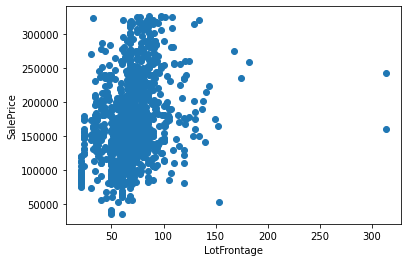

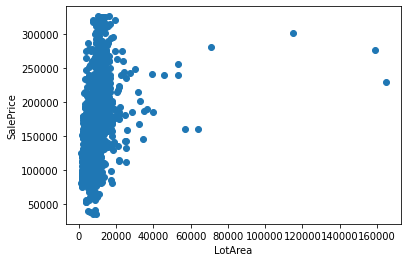

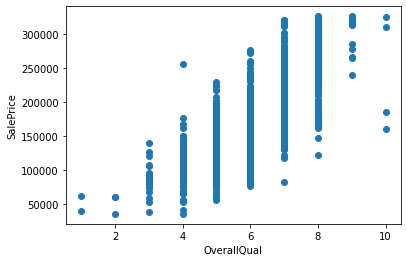

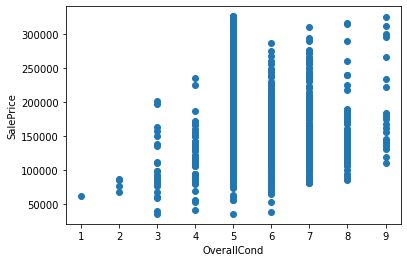

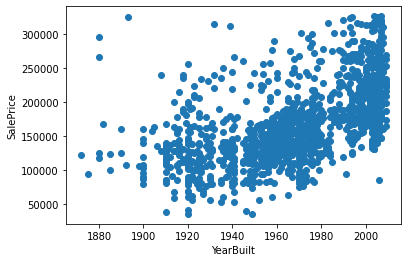

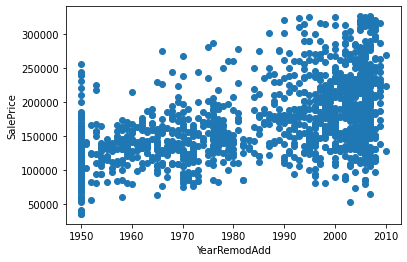

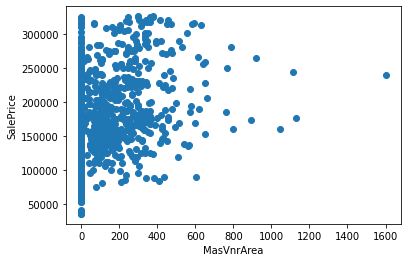

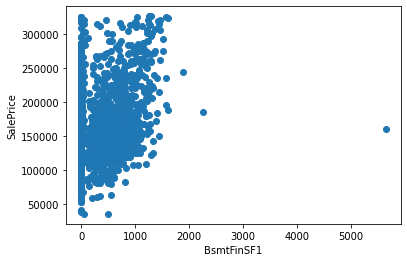

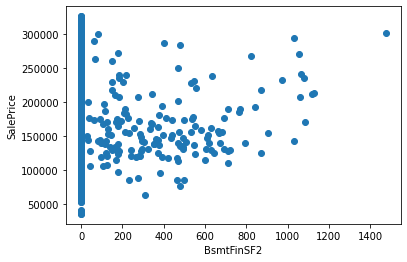

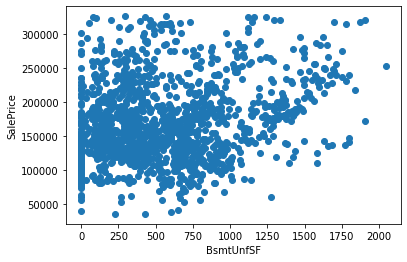

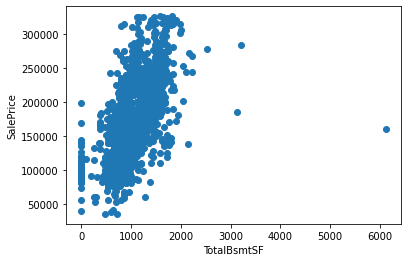

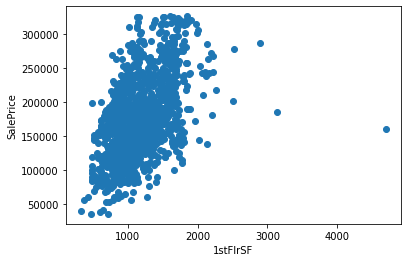

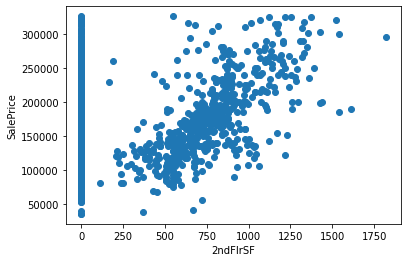

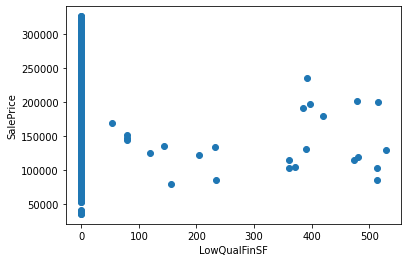

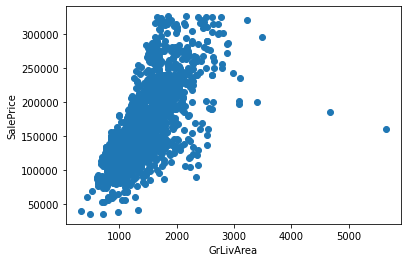

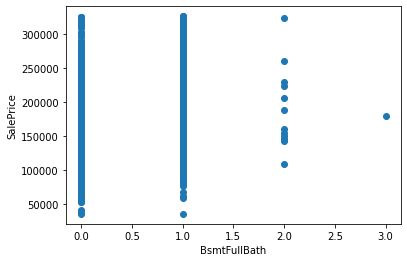

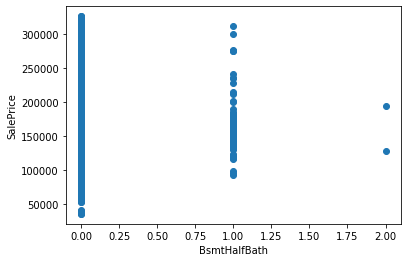

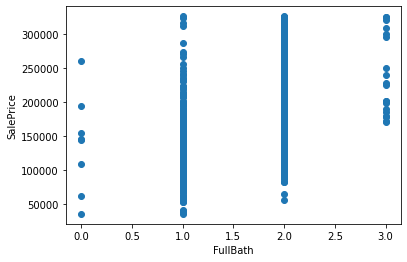

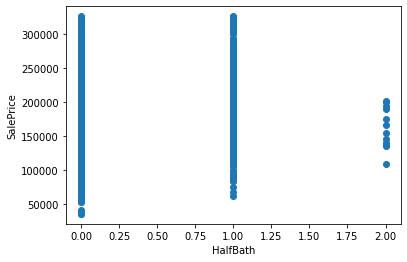

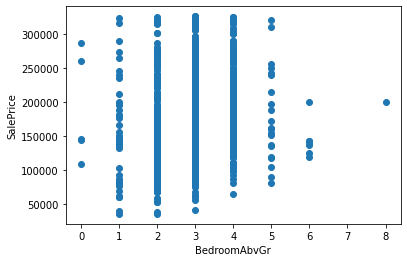

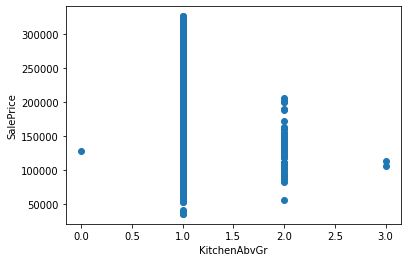

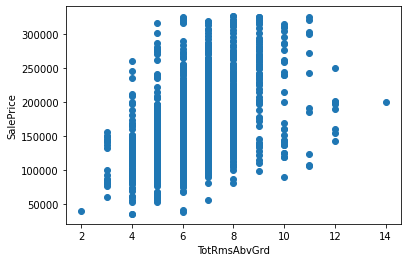

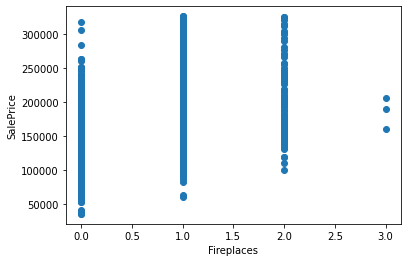

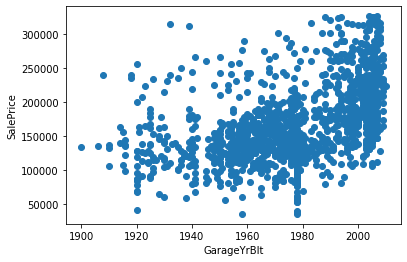

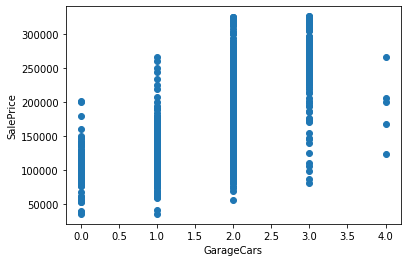

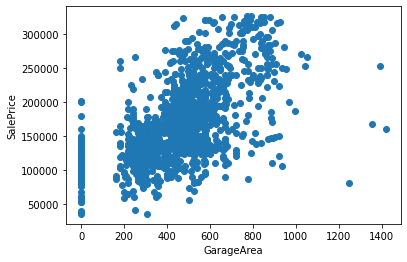

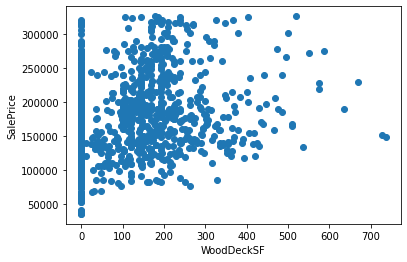

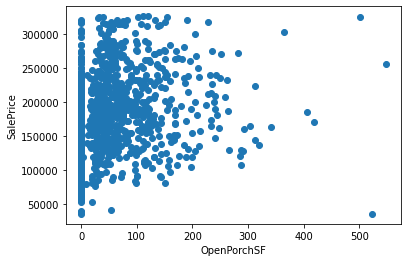

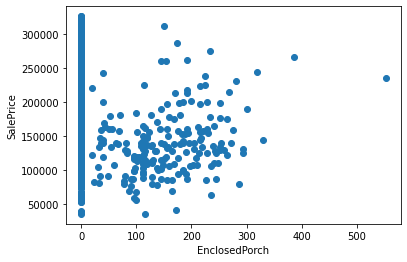

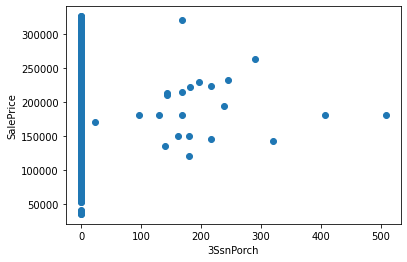

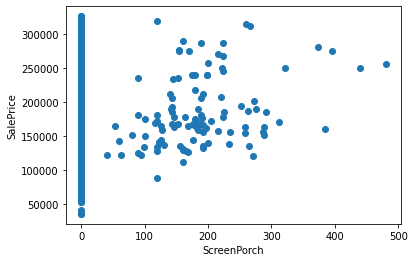

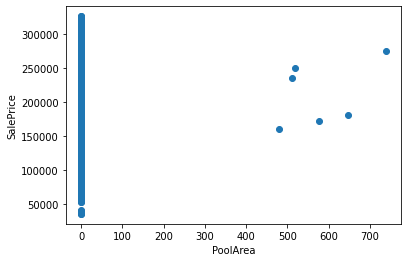

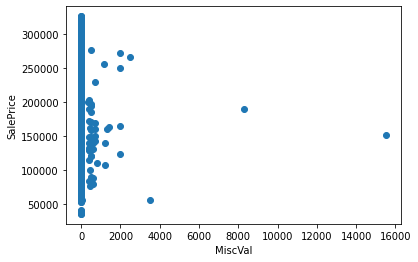

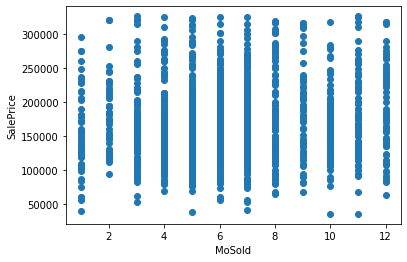

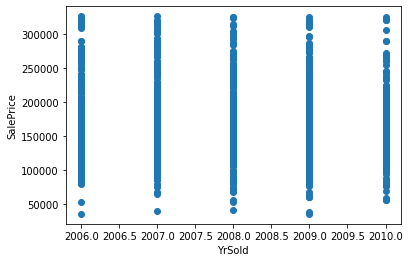

In [758]:
for col in data_predictors_num.columns:
    plt.scatter( data[col] , data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.show()

### Again, there are a lot of variables to inpect visually. Do a correlation analysis instead

In [759]:
#find variables which have a correlation to greater than 30%
corr = data.corr()
corr = corr[abs(corr['SalePrice']) > 0.3 ]['SalePrice']*100
corr.sort_values(ascending=False)

SalePrice       100.000000
OverallQual      78.106046
GrLivArea        65.333088
GarageCars       62.529336
GarageArea       60.206413
FullBath         57.569514
YearBuilt        56.463085
TotalBsmtSF      54.320719
YearRemodAdd     54.153601
1stFlrSF         52.451808
GarageYrBlt      47.991040
TotRmsAbvGrd     46.924876
Fireplaces       45.158133
MasVnrArea       34.038938
OpenPorchSF      32.161625
2ndFlrSF         30.281498
WoodDeckSF       30.126141
Name: SalePrice, dtype: float64

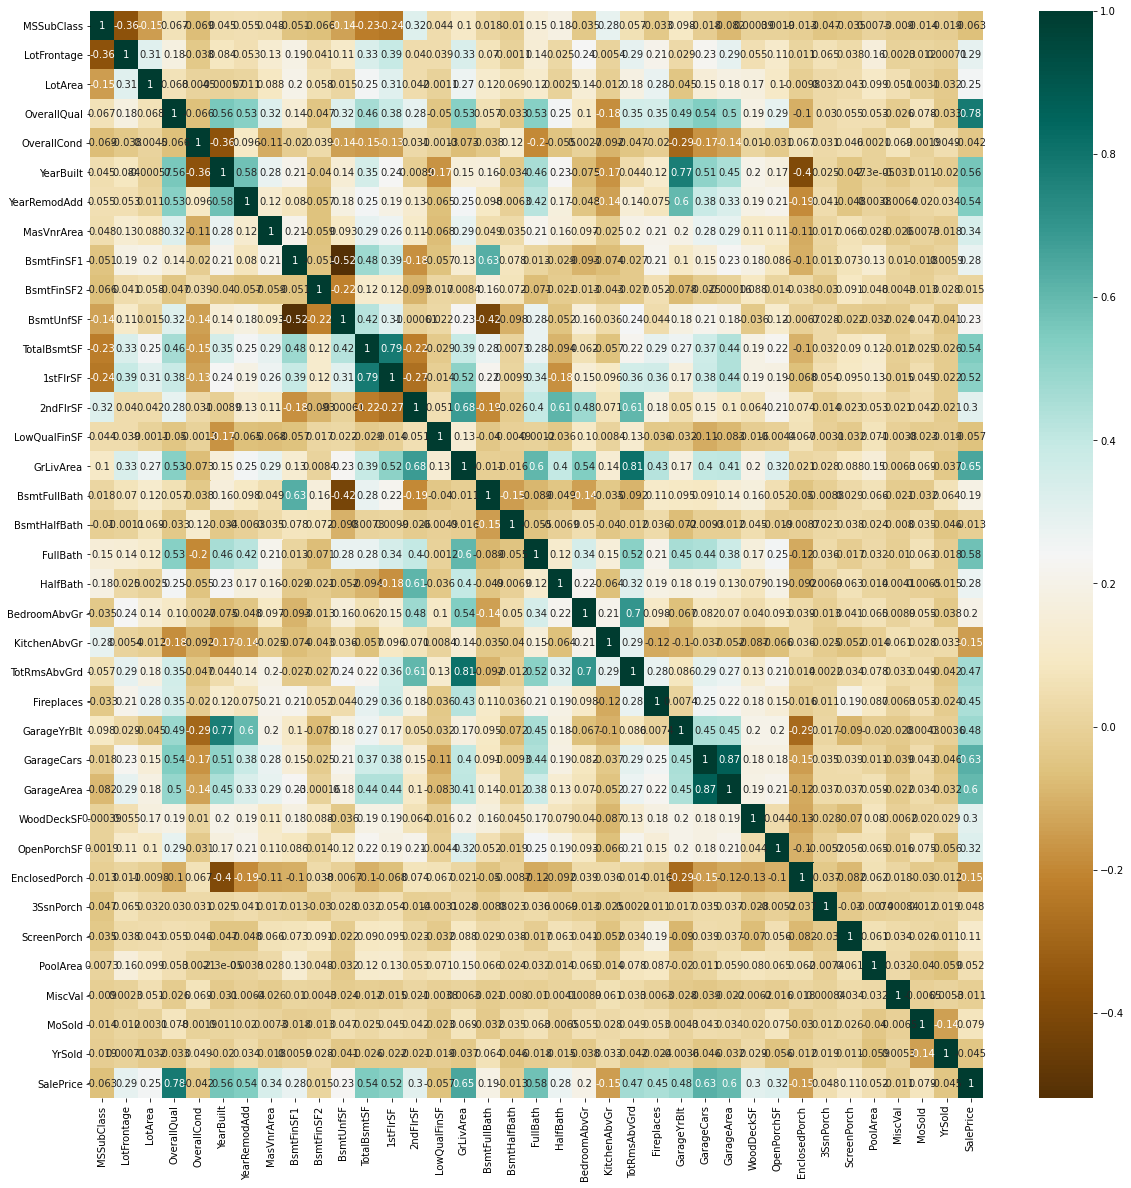

In [760]:
#create correlation heatmap
plt.figure(figsize = (20, 20))
sns.heatmap(data.corr(), annot = True, cmap="BrBG")
plt.show()

### Drop below columns as they are highly correlated with other variables and will cause multicollinearity :
- 'GarageYrBlt' is highly correlated with 'YearBuilt'
- 'TotRmsAbvGrd is highly correlated with 'GrLivArea'
- '2ndFlrSF', '1stFlrSF' are highly correlated with 'GrLivArea'
- 'GarageCars' is highly correlated with 'GarageArea'

In [761]:
data.drop(columns=['GarageYrBlt', 'TotRmsAbvGrd', '2ndFlrSF', '1stFlrSF', 'GarageCars'], inplace=True)

### There are numerous categorical variables with no clear ones standing out. Selecting the significant ones from such variables using a feature elimination technique like lasso regression would require having to convert these variables to dummies, which would be quite tedious. Instead, we use *Point Biserial correlation* to weed out the insignificant variables first.

### Use label encoder to encode categorical variables as Point Biserial Correlation doesn't work on text fields

In [762]:
data1 = data.copy()
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
for col in data_predictors_cat:
    data1[col]= label_encoder.fit_transform(data1[col]) 


In [763]:
data1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


### Create a dataframe containing the Point Biserial Correlations of categorical variables with Sale Price

In [764]:
l = []
for column in data_predictors_cat.columns:
    corr_num = stats.pointbiserialr(data1[column], data1['SalePrice'])
    l.append([column,corr_num.correlation*100,corr_num.pvalue])
numerical_correlations = pd.DataFrame(data=l, columns = ['Column','Correlation with Sale Price', 'P_Value'])

In [765]:
#select variables with absolute correlations above 30%
numerical_correlations = numerical_correlations[abs(numerical_correlations['Correlation with Sale Price']) > 30].sort_values(by='Correlation with Sale Price', ascending=True)
numerical_correlations

,Column,Correlation with Sale Price,P_Value
32,GarageFinish,-56.350166,4.793178e-117
17,ExterQual,-55.366924,3.092688e-112
20,BsmtQual,-53.055499,1.534353e-101
31,GarageType,-49.057955,6.890998e-85
29,KitchenQual,-48.672184,2.144069e-83
26,HeatingQC,-40.949097,3.291357e-57
27,CentralAir,30.005134,2.997886e-30
19,Foundation,39.732713,1.137104e-53


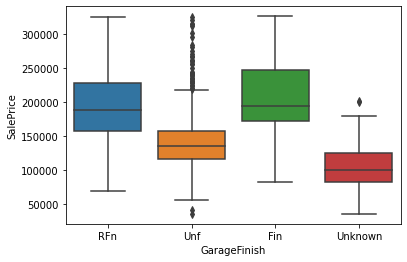

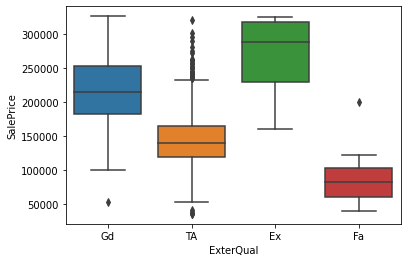

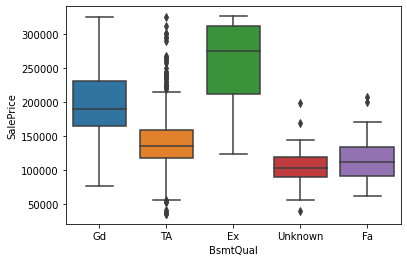

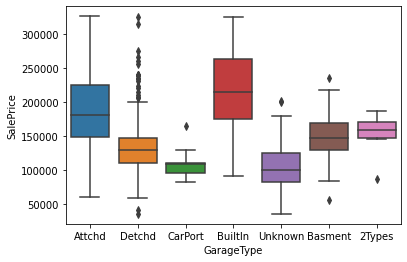

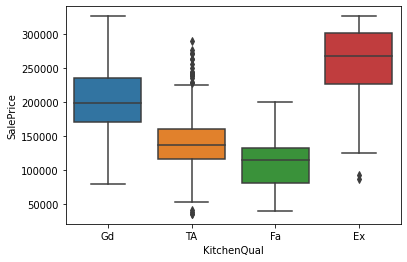

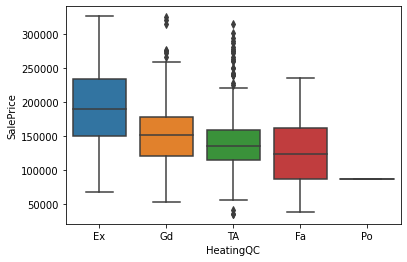

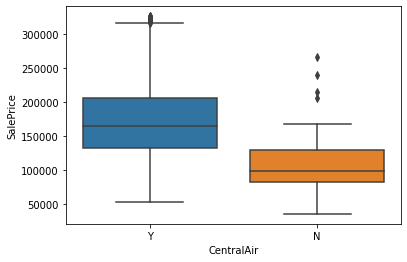

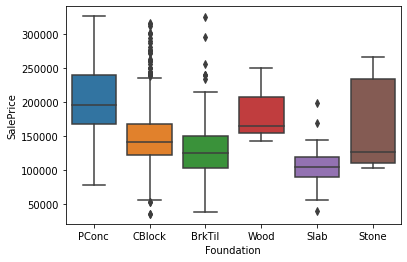

In [766]:
#Create boxplots again for only these variables and check if we can see the correlations visually
for col in numerical_correlations['Column']:

    sns.boxplot(x = col, y = 'SalePrice', data = data)
    plt.show()

### As is evident, the correlation between significant variables and sale price is much more visually evident now. The relationships are also sensible. E.g for Garage Finish, Sale Price is highest for Finished garage, less for Rough Finish, even lesser for Unfinished, and least for 'No Garage'. 

### Create dummies for these 8 variables

In [767]:
#Some columns have the same categorical values. Append column names to such values
repeated_cols = [ 'ExterQual', 'BsmtQual', 'KitchenQual', 'HeatingQC']
for col in repeated_cols:
    append_string = col+'_'
    data[col].replace({'Ex': append_string+'Ex', 'Gd': append_string+'Gd', 'TA': append_string+'TA', 'Fa':append_string+'Fa', 'Po':append_string+'Po'}, inplace=True)

In [768]:
garage_dummy = pd.get_dummies(data['GarageFinish'], drop_first = False)
garage_dummy.drop(columns = ['Unknown'], inplace = True)

In [769]:
garage_dummy

,Fin,RFn,Unf
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
1455,0,1,0
1456,0,0,1
1457,0,1,0
1458,0,0,1


In [770]:
exterQual_dummy = pd.get_dummies(data['ExterQual'], drop_first = True)

In [771]:
exterQual_dummy

,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
1455,0,0,1
1456,0,0,1
1457,0,0,0
1458,0,0,1


In [772]:
bsmtQual_dummy = pd.get_dummies(data['BsmtQual'], drop_first = False)
bsmtQual_dummy.drop(columns = ['Unknown'], inplace = True)

In [773]:
garageType_dummy = pd.get_dummies(data['GarageType'], drop_first = False)
garageType_dummy.drop(columns = ['Unknown'], inplace = True)

In [774]:
kitchenQual_dummy = pd.get_dummies(data['KitchenQual'], drop_first = True)

In [775]:
heatingQC_dummy = pd.get_dummies(data['HeatingQC'], drop_first = True)

In [776]:
centralAir_dummy = pd.get_dummies(data['CentralAir'], drop_first = True)

In [777]:
foundation_dummy = pd.get_dummies(data['Foundation'], drop_first = True)

In [778]:
#find variables which have a correlation to greater than 30% after data cleaning 
corr = data.corr()
corr = corr[abs(corr['SalePrice']) > 0.3 ]['SalePrice']*100
corr.sort_values(ascending=False)

SalePrice       100.000000
OverallQual      78.106046
GrLivArea        65.333088
GarageArea       60.206413
FullBath         57.569514
YearBuilt        56.463085
TotalBsmtSF      54.320719
YearRemodAdd     54.153601
Fireplaces       45.158133
MasVnrArea       34.038938
OpenPorchSF      32.161625
WoodDeckSF       30.126141
Name: SalePrice, dtype: float64

In [779]:
#Take data backup
data_backup = data.copy()

In [780]:
corr.index

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'Fireplaces', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [781]:
#make a list of numerical and categorical variables that have high correlation with Sales Price
selected_cols = list(corr.index)

### Contract the 'data' dataframe to only selected columns, that are left after eliminating columns that have either missing data, or show multicollinearity, or are irrelevant, or have insignificant correlation with target variable

In [782]:
data = data[selected_cols]

### Add the dummy variables to this dataframe

In [783]:
data = pd.concat([data, garage_dummy], axis = 1)

In [784]:
data = pd.concat([data, exterQual_dummy], axis = 1)

In [785]:
data = pd.concat([data, bsmtQual_dummy], axis = 1)

In [786]:
data = pd.concat([data, garageType_dummy], axis = 1)

In [787]:
data = pd.concat([data, kitchenQual_dummy], axis = 1)

In [788]:
data = pd.concat([data, heatingQC_dummy], axis = 1)

In [789]:
data = pd.concat([data, foundation_dummy], axis = 1)

In [790]:
data.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'Fireplaces', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice', 'Fin', 'RFn', 'Unf', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'BsmtQual_Ex', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_TA', '2Types', 'Attchd', 'Basment', 'BuiltIn',
       'CarPort', 'Detchd', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po',
       'HeatingQC_TA', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'],
      dtype='object')

### Do a train-test split

In [791]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)


### Scale the numerical variables on training set using min-max scalar. We do scaling separately on training and test sets as we are supposed to pretent that we do not know the test data

In [792]:
df_data = df_train.select_dtypes(include=['int64','float64'])
num_cols = df_data.columns

In [793]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [794]:
#Separate target and precidtor variables into different datasets
y = df_train.pop('SalePrice')
X = df_train

In [795]:
#Add ones for constant
import statsmodels.api as sm  
X = sm.add_constant(X)

In [796]:
X

,const,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageArea,...,KitchenQual_TA,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CBlock,PConc,Slab,Stone,Wood
837,1.0,0.555556,0.737226,0.389831,0.098750,0.150655,0.150392,0.333333,0.000000,0.189928,...,1,0,0,0,1,1,0,0,0,0
1257,1.0,0.444444,0.364964,0.000000,0.000000,0.269495,0.122064,0.333333,0.000000,0.000000,...,1,0,0,0,0,0,1,0,0,0
601,1.0,0.555556,0.474453,0.000000,0.000000,0.243294,0.239751,0.333333,0.333333,0.391367,...,0,0,0,0,1,0,1,0,0,0
1185,1.0,0.444444,0.379562,0.000000,0.000000,0.244541,0.204284,0.333333,0.000000,0.282014,...,1,0,1,0,0,0,0,0,0,0
568,1.0,0.777778,0.810219,1.000000,0.000000,0.466625,0.414095,0.333333,0.333333,0.440288,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.555556,0.956204,0.898305,0.106250,0.264504,0.118379,0.333333,0.000000,0.302158,...,0,0,0,0,0,0,1,0,0,0
55,1.0,0.555556,0.671533,0.237288,0.170000,0.444479,0.251267,0.666667,0.333333,0.414388,...,1,0,1,0,0,1,0,0,0,0
367,1.0,0.555556,0.656934,0.203390,0.190625,0.342795,0.252649,0.333333,0.333333,0.212950,...,1,0,1,0,0,1,0,0,0,0
82,1.0,0.777778,0.985401,0.966102,0.292500,0.487523,0.283049,0.666667,0.333333,0.545324,...,0,0,0,0,0,0,1,0,0,0


### 1.3 Simple Linear Regression

In [797]:
#Fit a LM model
reg = LinearRegression() 
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [798]:
# Predictions on the basis of the model
y_pred = reg.predict(X)
y_pred

array([ 0.24846925,  0.1665038 ,  0.39062173,  0.27068372,  0.78180541,
        0.65858597,  0.18390823,  0.26070459,  0.61353943,  0.66840037,
        0.5153245 ,  0.26286605,  0.42118642,  0.62973746,  0.45409358,
        0.36900085,  0.3379245 ,  0.22354535,  0.61796839,  0.48400668,
        0.28664644,  0.34771741,  0.10775653,  0.09212758,  0.65121535,
        0.13526023,  0.29331788,  0.38401219,  0.4098377 ,  0.30491184,
        0.48614244,  0.44883623,  0.25024088,  0.51132243,  0.81329447,
        0.52344044,  0.48290003,  0.80292817,  0.81396855,  0.40210152,
        0.25981611,  0.54722519,  0.64735512,  0.37193329,  0.32269059,
        0.42670111,  0.36152171,  0.33972712,  0.19815504,  0.39706237,
        0.71324663,  0.27862746,  0.34266461,  0.4645438 ,  0.30734015,
        0.41649611,  0.43849948,  0.25568931,  0.40150173,  0.47684905,
        0.55377711,  0.48521845,  0.39026378,  0.49095096,  0.77013499,
        0.63310607,  0.51248752,  0.76621644,  0.8614369 ,  0.23

In [799]:
# R-Squared of training data
r2_train = r2_score(y, y_pred) 
r2_train

0.8484305977987976

In [800]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y - y_pred))
print(rss)
mse = mean_squared_error(y, y_pred)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

5.761198271242323
0.0059393796610745595
0.0770673709235923


In [801]:
# Residual analysis
y_res = y - y_pred
#y_res

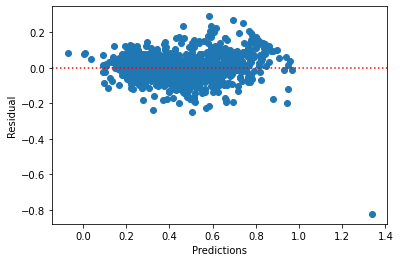

In [802]:
#df_train['res'] = y_res
plt.scatter( y_pred , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

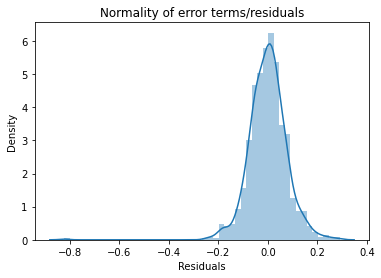

In [803]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### As is evident, the errors appear random, unbiased, with a neat normal distrubution with a minor skew

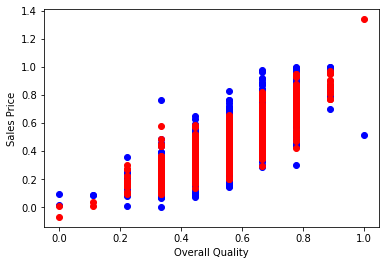

In [804]:
# Visual comparison between predicted and actual values
plt.scatter( X['OverallQual'] , y , color = 'blue') # actual values
plt.scatter( X['OverallQual'] , y_pred , color = 'red' ) # predicted values
plt.xlabel("Overall Quality")
plt.ylabel("Sales Price")
plt.show()

### Prepare test data and do the predictions

In [805]:
df_data_test = df_test.select_dtypes(include=['int64','float64'])
num_cols = df_data_test.columns

In [806]:
# Transform the test data as per the min-max scalar fitted to training data
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [807]:
Y = df_test.pop('SalePrice')
X_test = df_test

In [808]:
# Add ones for constant
import statsmodels.api as sm  
X_test = sm.add_constant(X_test)

In [809]:
Y_pred = reg.predict(X_test)

In [810]:
r2_score(Y, Y_pred) # R-Squared for test data

0.6888486877141293

### There's a lot of difference between R-Squared value of training data and test data. Since the residuals are well behaved, unbiased, and normal, we conclude that it is the high number of predictor variables that's causing the model of overfit. Hence, we do not try Polynomial Regression and deem it safe to assume that data is linearly related to target variable.

In [811]:
#Residual analysis for test data
Y_res = Y-Y_pred

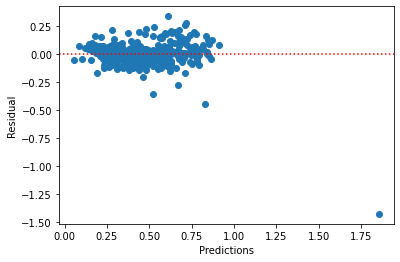

In [812]:
plt.scatter( Y_pred , Y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Some downward bias can be seen in the residuals on test data

### 1.3 Ridge Regression

Test r2 score for lambda = 0   :   0.6892
MSE on train data = 0.005939406398529486
MSE on test data = 0.011867092914689358


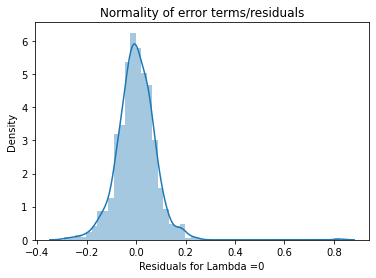



Test r2 score for lambda = 0.001   :   0.6889
MSE on train data = 0.0059393797471282974
MSE on test data = 0.011878494892524712


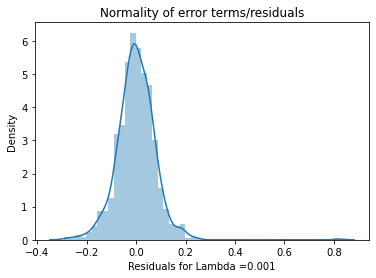



Test r2 score for lambda = 0.01   :   0.6891
MSE on train data = 0.005939388222632537
MSE on test data = 0.011871011084863992


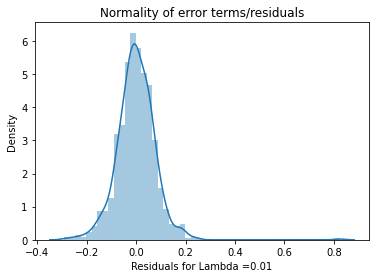



Test r2 score for lambda = 0.1   :   0.6909
MSE on train data = 0.005940194284576682
MSE on test data = 0.011799146718634012


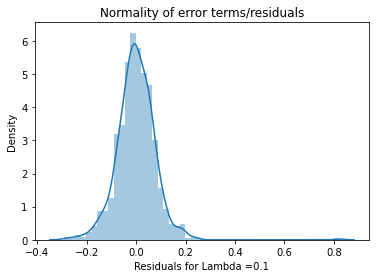



Test r2 score for lambda = 1   :   0.7043
MSE on train data = 0.005993731128961879
MSE on test data = 0.011288306481703094


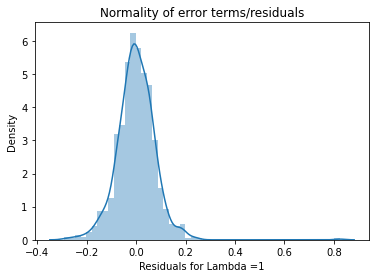



Test r2 score for lambda = 10   :   0.7266
MSE on train data = 0.006974677579836207
MSE on test data = 0.010437559582493676


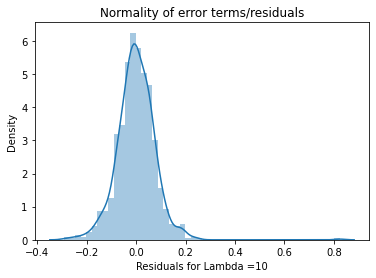



Test r2 score for lambda = 100   :   0.6387
MSE on train data = 0.012100283926489517
MSE on test data = 0.013795780644935996


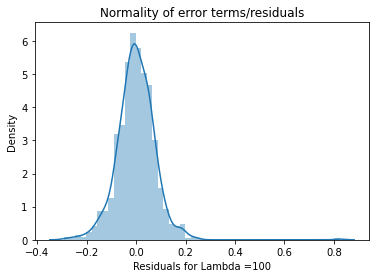



Test r2 score for lambda = 1000   :   0.4385
MSE on train data = 0.02110500439677966
MSE on test data = 0.021436108358398757


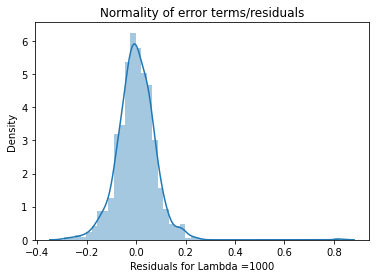

In [813]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000] # Higher the value of lambda, 
                                                  # more the regularization
for i in lambdas: # for each lambda we get different model coefficients
    ridgereg = Ridge(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(X, y) # fit the model on the polynomial features
  
    #Computing the r2 score
    Y_pred_reg = ridgereg.predict(X_test)
    y_pred_reg = ridgereg.predict(X)
    print("Test r2 score for lambda = " + str(i) + "   :   " + str(round(r2_score(Y, Y_pred_reg), 4)) )
    print("MSE on train data = " + str(mean_squared_error(y, y_pred_reg)))
    print("MSE on test data = " + str(mean_squared_error(Y, Y_pred_reg)))
    y_res= y_pred-y
    p = sns.distplot(y_res,kde=True)

    p = plt.title('Normality of error terms/residuals')
    plt.xlabel("Residuals for Lambda =" + str(i))
    plt.show()
    print("\n")

### We can see that R2 score on test data is highest and test MSE is lowest when Lamda is 10, which means the model needs a fair amount of regularization. There's only a minor difference between training MSEs for different lambdas and we see that errors remain well-behaved for all values of lambda. 
### While choosing training MSE as a criterion for selection of appropriate lambda would have given us a lambda of 0.01, we choose Test-R-squared here for selection criteria here as  a lambda of 10 gives a significantly better results than lambda of 0.01.

### Test with a narrower band of Lambdas around 10 to fine tune further

In [814]:
lambdas = [5,10,15] # Higher the value of lambda, 
                                                  # more the regularization
for i in lambdas: # for each lambda we get different model coefficients
    ridgereg = Ridge(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(X, y) # fit the model on the polynomial features
  
    #Computing the r2 score
    Y_pred_reg = ridgereg.predict(X_test)
    y_pred_reg = ridgereg.predict(X)
    print("Test r2 score for lambda = " + str(i) + "   :   " + str(round(r2_score(Y, Y_pred_reg), 4)) )
    print("MSE on train data = " + str(mean_squared_error(y, y_pred_reg)))
    print("MSE on test data = " + str(mean_squared_error(Y, Y_pred_reg)))
    print("\n") 
    

Test r2 score for lambda = 5   :   0.7237
MSE on train data = 0.006440159415543773
MSE on test data = 0.010549634683874945


Test r2 score for lambda = 10   :   0.7266
MSE on train data = 0.006974677579836207
MSE on test data = 0.010437559582493676


Test r2 score for lambda = 15   :   0.7238
MSE on train data = 0.007450106803656952
MSE on test data = 0.010544462633598364




### We can see again that lambda = 10 gives the highest score, so we go with lambda = 10 for ridge regression model

### 1.4 Lasso Regression

Test r2 score for lambda = 0.0001   :   0.6984
MSE on train data = 0.005967599832562512
MSE on test data = 0.011515725896010924


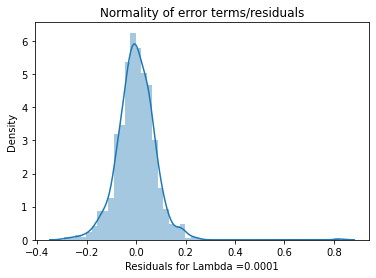



Test r2 score for lambda = 0.001   :   0.7204
MSE on train data = 0.006433985745527894
MSE on test data = 0.010674917465583215


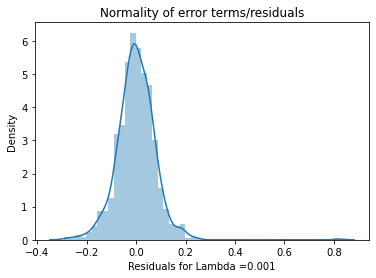



Test r2 score for lambda = 0.01   :   0.5267
MSE on train data = 0.017195138050675803
MSE on test data = 0.018068880587222263


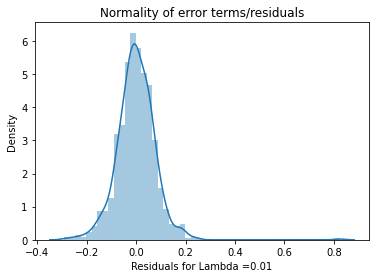



Test r2 score for lambda = 0.1   :   -0.0041
MSE on train data = 0.03918587508308748
MSE on test data = 0.03833652596864153


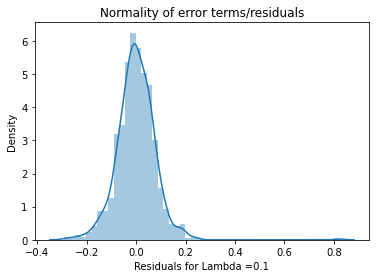



Test r2 score for lambda = 1   :   -0.0041
MSE on train data = 0.03918587508308748
MSE on test data = 0.03833652596864153


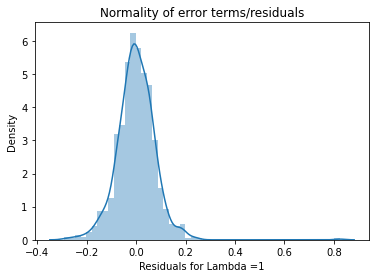



Test r2 score for lambda = 10   :   -0.0041
MSE on train data = 0.03918587508308748
MSE on test data = 0.03833652596864153


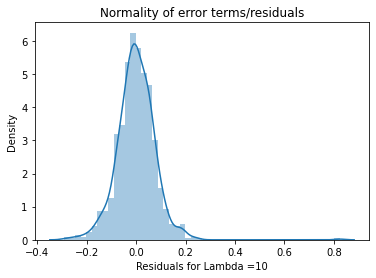



Test r2 score for lambda = 100   :   -0.0041
MSE on train data = 0.03918587508308748
MSE on test data = 0.03833652596864153


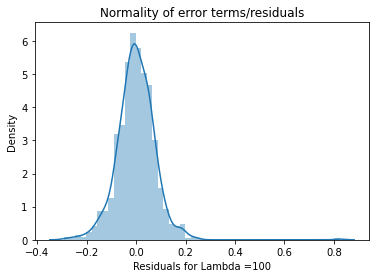



Test r2 score for lambda = 1000   :   -0.0041
MSE on train data = 0.03918587508308748
MSE on test data = 0.03833652596864153


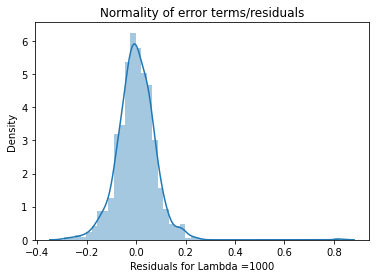

In [815]:
# Applying Lasso Regression with varying the hyperparameter 'lambda'

lambdas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas:
    
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X, y)
    # Compute R^2 
    Y_pred_reg = lassoreg.predict(X_test)
    y_pred_reg = lassoreg.predict(X)
    print("Test r2 score for lambda = " + str(i) + "   :   " + str(round(r2_score(Y, Y_pred_reg), 4)) )
    print("MSE on train data = " + str(mean_squared_error(y, y_pred_reg)))
    print("MSE on test data = " + str(mean_squared_error(Y, Y_pred_reg)))
    y_res= y_pred-y
    p = sns.distplot(y_res,kde=True)

    p = plt.title('Normality of error terms/residuals')
    plt.xlabel("Residuals for Lambda =" + str(i))
    plt.show()
    print("\n")

### Just like ridge regression, training MSE and residuals are quite well behaved, but we get the highest Test R-squared at lambda = 0.001. We also see the ridge regression performs slightly better than Lasso

### Extract model coefficients (betas) for Ridge and Lasso regressions with respective optimal alphas

In [816]:
ridgereg = Ridge(alpha = 10)
ridgereg.fit(X,y)
y_pred_train = ridgereg.predict(X)
y_pred_test = ridgereg.predict(X_test)
print(ridgereg.coef_)

[ 0.          0.18783411  0.0195327   0.04098811  0.06110071  0.14788684
  0.2280815   0.05396264  0.13140269  0.16734501  0.05911798  0.03686049
  0.02314722  0.01392444 -0.00136554 -0.03004595  0.02678042 -0.01181296
  0.07091654 -0.03362718  0.00983291 -0.01655925 -0.01520523  0.039895
 -0.01054195  0.02900839 -0.01823245  0.01078237 -0.05992485 -0.03640831
 -0.07190647 -0.01406033 -0.01040664 -0.00550646 -0.01695473  0.00574471
  0.00350419 -0.01693316  0.01063561  0.00909816]


In [817]:
lassoreg = Lasso(alpha = 0.001)
lassoreg.fit(X,y)
y_pred_train = lassoreg.predict(X)
y_pred_test = lassoreg.predict(X_test)
print(lassoreg.coef_)

[ 0.          0.29615361  0.04891202  0.04067309  0.          0.1819262
  0.42761892  0.          0.10885936  0.20106316  0.03772784  0.
  0.00850037  0.         -0.0131556  -0.          0.02503508 -0.
  0.06555677 -0.          0.00712455 -0.00899878 -0.          0.02735326
 -0.          0.         -0.         -0.         -0.01086472 -0.
 -0.03305611 -0.         -0.00099479 -0.         -0.00680163  0.
  0.         -0.          0.         -0.        ]


### Create a dataframe for coefficients for Ridge and Lasso. Since Lasso performs feature selection as well, sort the dataframe by Lasso coefficients

In [818]:
betas = pd.DataFrame(index=list(X.columns), 
                     columns = ['Ridge', 'Lasso'])
betas['Ridge'] = ridgereg.coef_ # Ridge Regression
betas['Lasso'] = lassoreg.coef_ # Lasso Regression
betas.sort_values(by = 'Lasso', ascending=False)

,Ridge,Lasso
GrLivArea,0.228082,0.427619
OverallQual,0.187834,0.296154
GarageArea,0.167345,0.201063
TotalBsmtSF,0.147887,0.181926
Fireplaces,0.131403,0.108859
BsmtQual_Ex,0.070917,0.065557
YearBuilt,0.019533,0.048912
YearRemodAdd,0.040988,0.040673
WoodDeckSF,0.059118,0.037728
Attchd,0.039895,0.027353


In [819]:
#sort by ridge
betas = pd.DataFrame(index=list(X.columns), 
                     columns = ['Ridge', 'Lasso'])
betas['Ridge'] = ridgereg.coef_ # Ridge Regression
betas['Lasso'] = lassoreg.coef_ # Lasso Regression
betas.sort_values(by = 'Ridge', ascending=False)

,Ridge,Lasso
GrLivArea,0.228082,0.427619
OverallQual,0.187834,0.296154
GarageArea,0.167345,0.201063
TotalBsmtSF,0.147887,0.181926
Fireplaces,0.131403,0.108859
BsmtQual_Ex,0.070917,0.065557
MasVnrArea,0.061101,0.000000
WoodDeckSF,0.059118,0.037728
FullBath,0.053963,0.000000
YearRemodAdd,0.040988,0.040673


### Try with double the alphas

In [820]:
#use alpha of 20
ridgereg = Ridge(alpha = 20)
ridgereg.fit(X,y)
y_pred_train = ridgereg.predict(X)
y_pred_test = ridgereg.predict(X_test)
print(ridgereg.coef_)

[ 0.          0.14619093  0.01956262  0.04240686  0.05264147  0.11582945
  0.16369187  0.06134683  0.12587929  0.13567648  0.05270419  0.03581923
  0.03248755  0.0225969   0.00378215 -0.02813066  0.02563634 -0.02274305
  0.07216553 -0.02944133  0.00952436 -0.01721217 -0.00607231  0.04370642
 -0.00505208  0.02842262 -0.01120709  0.00906905 -0.05034867 -0.02395926
 -0.06235612 -0.01469374 -0.01071981 -0.00324148 -0.01563392  0.0045357
  0.00669156 -0.02069861  0.00727833  0.00603899]


In [821]:
#use alpha of 0.002
lassoreg = Lasso(alpha = 0.002)
lassoreg.fit(X,y)
print(lassoreg.coef_)

[ 0.          0.28726788  0.02480158  0.04602617  0.          0.14050069
  0.35290365  0.          0.10874886  0.19564117  0.01203947  0.
  0.00973496  0.         -0.01496087 -0.          0.03441409 -0.
  0.05739697 -0.          0.00364542 -0.01475161 -0.          0.03478499
 -0.          0.         -0.         -0.         -0.          0.
 -0.03362428 -0.         -0.         -0.         -0.0028632   0.
  0.00202178 -0.         -0.          0.        ]


In [822]:
#sort by Lasso
betas = pd.DataFrame(index=list(X.columns), 
                     columns = ['Ridge', 'Lasso'])
betas['Ridge'] = ridgereg.coef_ # Ridge Regression
betas['Lasso'] = lassoreg.coef_ # Lasso Regression
betas.sort_values(by = 'Lasso', ascending=False)

,Ridge,Lasso
GrLivArea,0.163692,0.352904
OverallQual,0.146191,0.287268
GarageArea,0.135676,0.195641
TotalBsmtSF,0.115829,0.140501
Fireplaces,0.125879,0.108749
BsmtQual_Ex,0.072166,0.057397
YearRemodAdd,0.042407,0.046026
Attchd,0.043706,0.034785
ExterQual_Gd,0.025636,0.034414
YearBuilt,0.019563,0.024802


In [823]:
betas = pd.DataFrame(index=list(X.columns), 
                     columns = ['Ridge', 'Lasso'])
betas['Ridge'] = ridgereg.coef_ # Ridge Regression
betas['Lasso'] = lassoreg.coef_ # Lasso Regression
betas.sort_values(by = 'Lasso', ascending=False)

,Ridge,Lasso
GrLivArea,0.163692,0.352904
OverallQual,0.146191,0.287268
GarageArea,0.135676,0.195641
TotalBsmtSF,0.115829,0.140501
Fireplaces,0.125879,0.108749
BsmtQual_Ex,0.072166,0.057397
YearRemodAdd,0.042407,0.046026
Attchd,0.043706,0.034785
ExterQual_Gd,0.025636,0.034414
YearBuilt,0.019563,0.024802


In [824]:
# with double alpha
betas = pd.DataFrame(index=list(X.columns), 
                     columns = ['Ridge', 'Lasso'])
betas['Ridge'] = ridgereg.coef_ # Ridge Regression
betas['Lasso'] = lassoreg.coef_ # Lasso Regression
betas.sort_values(by = 'Ridge', ascending=False)

,Ridge,Lasso
GrLivArea,0.163692,0.352904
OverallQual,0.146191,0.287268
GarageArea,0.135676,0.195641
Fireplaces,0.125879,0.108749
TotalBsmtSF,0.115829,0.140501
BsmtQual_Ex,0.072166,0.057397
FullBath,0.061347,0.000000
WoodDeckSF,0.052704,0.012039
MasVnrArea,0.052641,0.000000
Attchd,0.043706,0.034785


### Try the regression after removing 5 most important predictor variables

In [825]:
X_alt_train = X.drop(columns = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageArea', 'Fireplaces'])

In [826]:
X_alt_test = X_test.drop(columns = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageArea', 'Fireplaces'])

In [827]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000] # Higher the value of lambda, 
                                                  # more the regularization
for i in lambdas: # for each lambda we get different model coefficients
    ridgereg = Ridge(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(X_alt_train, y) # fit the model on the polynomial features
  
    #Computing the r2 score
    Y_pred_reg = ridgereg.predict(X_alt_test)
    y_pred_reg = ridgereg.predict(X_alt_train)
    print("Test r2 score for lambda = " + str(i) + "   :   " + str(round(r2_score(Y, Y_pred_reg), 4)) )
    print("MSE on train data = " + str(mean_squared_error(y, y_pred_reg)))
    print("MSE on test data = " + str(mean_squared_error(Y, Y_pred_reg)))
    print("\n")

Test r2 score for lambda = 0   :   0.6386
MSE on train data = 0.01178329735815039
MSE on test data = 0.013797486475916321


Test r2 score for lambda = 0.001   :   0.6392
MSE on train data = 0.011759609822842718
MSE on test data = 0.013773493399061674


Test r2 score for lambda = 0.01   :   0.6393
MSE on train data = 0.011759616317700231
MSE on test data = 0.01377247916649569


Test r2 score for lambda = 0.1   :   0.6395
MSE on train data = 0.011760209582467793
MSE on test data = 0.013763172572370981


Test r2 score for lambda = 1   :   0.6406
MSE on train data = 0.011792789085257544
MSE on test data = 0.013723067943229257


Test r2 score for lambda = 10   :   0.6258
MSE on train data = 0.012469559328406932
MSE on test data = 0.014284900976368076


Test r2 score for lambda = 100   :   0.5439
MSE on train data = 0.016016171496576196
MSE on test data = 0.01741166933704058


Test r2 score for lambda = 1000   :   0.4094
MSE on train data = 0.02228503254053593
MSE on test data = 0.0225496766

In [828]:
# Applying Lasso Regression with varying the hyperparameter 'lambda'

lambdas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas:
    
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_alt_train, y)
    # Compute R^2 
    Y_pred_reg = lassoreg.predict(X_alt_test)
    y_pred_reg = lassoreg.predict(X_alt_train)
    print("Test r2 score for lambda = " + str(i) + "   :   " + str(round(r2_score(Y, Y_pred_reg), 4)) )
    print("MSE on train data = " + str(mean_squared_error(y, y_pred_reg)))
    print("MSE on test data = " + str(mean_squared_error(Y, Y_pred_reg)))
    print("\n")

Test r2 score for lambda = 0.0001   :   0.6384
MSE on train data = 0.01179100084140758
MSE on test data = 0.01380513021137965


Test r2 score for lambda = 0.001   :   0.6236
MSE on train data = 0.012543176082072028
MSE on test data = 0.014369295233179162


Test r2 score for lambda = 0.01   :   0.4659
MSE on train data = 0.019459708603806244
MSE on test data = 0.020392897426546198


Test r2 score for lambda = 0.1   :   -0.0041
MSE on train data = 0.03918587508308748
MSE on test data = 0.03833652596864153


Test r2 score for lambda = 1   :   -0.0041
MSE on train data = 0.03918587508308748
MSE on test data = 0.03833652596864153


Test r2 score for lambda = 10   :   -0.0041
MSE on train data = 0.03918587508308748
MSE on test data = 0.03833652596864153


Test r2 score for lambda = 100   :   -0.0041
MSE on train data = 0.03918587508308748
MSE on test data = 0.03833652596864153


Test r2 score for lambda = 1000   :   -0.0041
MSE on train data = 0.03918587508308748
MSE on test data = 0.0383365

## Optimal alphas are 1 for ridge and 0.0001 for lasso

In [831]:
ridgereg = Ridge(alpha = 1)
ridgereg.fit(X_alt_train,y)
lassoreg = Lasso(alpha = 0.001)
lassoreg.fit(X_alt_train,y)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [834]:
lassoreg = Lasso(alpha = 0.0001)
lassoreg.fit(X_alt_train,y)
y_pred_train = lassoreg.predict(X)
y_pred_test = lassoreg.predict(X_test)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 35 is different from 40)

In [835]:
betas = pd.DataFrame(index=list(X_alt_train.columns), 
                     columns = ['Ridge', 'Lasso'])
betas['Ridge'] = ridgereg.coef_ # Ridge Regression
betas['Lasso'] = lassoreg.coef_ # Lasso Regression
betas.sort_values(by = 'Ridge', ascending=False)

,Ridge,Lasso
MasVnrArea,0.249731,0.271208
FullBath,0.217273,0.223424
BsmtQual_Ex,0.171530,0.184553
WoodDeckSF,0.109737,0.109306
OpenPorchSF,0.105278,0.104372
BsmtQual_Gd,0.088221,0.100661
Attchd,0.084453,0.073764
Fin,0.083417,0.090179
BuiltIn,0.072029,0.060086
RFn,0.066077,0.072753
